In [1]:
# import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
# %matplotlib inline

In [8]:
import datetime
import pickle
import csv
import numpy as np
import random
import sys
## from file_util import create_folder  # Removed in python3, us os.mkdir() instead.
import os
maxInt = sys.maxsize
decrement = True

while decrement:
    # decrease the maxInt value by factor 10
    # as long as the OverflowError occurs.
    
    decrement = False
    try:
        csv.field_size_limit(maxInt)
    except OverflowError:
        maxInt = int(maxInt/10)
        decrement = True

In [47]:
# name_dataset        = 'news-19_paragraph_swap-random-1m'
# name_dataset        = 'headline_swap_news_v2'
# name_dataset        = 'headline_swap_news_v2.5'
# name_dataset        = 'headline_swap_news_v2.5_mf8'
name_dataset        = 'iitg_21'
path_raw_data       = '/content/drive/MyDrive/nela-17/IITG-DATA/'
path_processed_data = '/content/drive/MyDrive/nela-17/IITG-DATA/whole'

In [46]:
os.mkdir(path_processed_data)
os.mkdir(path_processed_data + '/train')
os.mkdir(path_processed_data + '/dev')
os.mkdir(path_processed_data + '/test')
os.mkdir(path_processed_data + '/debug')
os.mkdir(path_processed_data + '/real_world')  # Check

# get term-/document-frequency

In [48]:
csv_reader = csv.reader(open(path_raw_data + '/train.csv', 'r'))  # Check

tkn2tf = {}
len_heads = [] #1
len_paras = [] #2
cnt_paras = [] #3
len_bodys = [] #4

# csv data: 0:id, 1:head, 2:body, 3:label

print(datetime.datetime.now().isoformat())

for n, row in enumerate(csv_reader):
    if (n+1) % 100000 == 0: print(n+1)
    
    head = row[1].lower().strip()
    
    for tkn in head.split():
        if tkn in tkn2tf: tkn2tf[tkn] += 1
        else: tkn2tf[tkn] = 1
    len_heads.append(len(head.split())) #1
    
    body = row[2].lower().strip()
    tkn_para = []
    for para in body.split('<eop>'):
        if para and para != ' ':
            _para = para + '<eop>'
            len_para = len(_para.split())
            len_paras.append(len_para) #2
            tkn_para.append(_para)
    cnt_paras.append(len(tkn_para)) #3
    
    body_split = []
    for tkn in body.split():
        if tkn in tkn2tf: tkn2tf[tkn] += 1
        else: tkn2tf[tkn] = 1
        body_split.append(tkn)
    len_bodys.append(len(body_split)) #4
            
print(n+1, 'Done')
print(datetime.datetime.now().isoformat())
print('voca size :', len(tkn2tf))

2021-04-17T18:25:28.466389
71421 Done
2021-04-17T18:26:10.909054
voca size : 277397


In [ ]:
s

In [50]:
n

71420

In [51]:
sorted_token = sorted(tkn2tf.items(), key=lambda kv: kv[1], reverse=True)
tkn2idx = {}
for idx, (tkn, _) in tqdm(enumerate(sorted_token)):
    tkn2idx[tkn] = idx + 2
tkn2idx['<unk>'] = 1
tkn2idx[''] = 0
if len(tkn2idx) == len(tkn2tf)+2:
    print(len(tkn2idx), 'No problem')
print() 

print('Show top-10 tkn:')
for tkn, freq in sorted_token[:10]:
    print(tkn,':',freq)
print('')

277397it [00:00, 961350.84it/s]

277399 No problem

Show top-10 tkn:
the : 2439263
, : 2109351
<eos> : 1913432
. : 1773853
to : 1234876
of : 1037461
and : 967964
a : 916945
<eop> : 892335
in : 785245



In [53]:
with open(path_processed_data + 'dic_mincut0.txt', 'w') as f:
    for key in tkn2idx.keys():
        f.write(key+'\n')

In [54]:
tkn2tf_mincut5 = {}
for tkn, tf in tkn2tf.items():
    if tf < 30:
        continue
    tkn2tf_mincut5[tkn] = tf
print('voca size :', len(tkn2tf_mincut5))

voca size : 31471


In [55]:
tkn2tf_mincut5['<EOS>'] = tkn2tf_mincut5['<eos>']
tkn2tf_mincut5['<EOP>'] = tkn2tf_mincut5['<eop>']

del tkn2tf_mincut5['<eos>']
del tkn2tf_mincut5['<eop>']

In [56]:
import operator
sorted_voca = sorted(tkn2tf_mincut5.items(), key=operator.itemgetter(1))

In [57]:
list_voca_mincut = []
list_voca_mincut.append('')   # PAD
list_voca_mincut.append('<UNK>')   # UNK
list_voca_mincut.append('<EOS>')   # EOS
list_voca_mincut.append('<EOP>')   # EOP

for word, idx in sorted_voca:
    if word=='<UNK>' or word=='<EOP>' or word=='<EOS>':
        print("existing word", word)
        continue
    else:
        list_voca_mincut.append(word)
        
len(list_voca_mincut)

existing word <EOP>
existing word <EOS>


31473

In [60]:
with open(path_raw_data + 'dic_mincutN.txt', 'w') as f:
    for i in range(len(list_voca_mincut)):
        f.write(list_voca_mincut[i]+'\n')

In [61]:
dic_voca = {}
for voca in list_voca_mincut:
    dic_voca[voca] = len(dic_voca)

In [69]:
print(dic_voca[''], dic_voca['<UNK>'], dic_voca['<EOS>'], dic_voca['<EOP>'])


0 1 2 3


TypeError: ignored

In [70]:
with open(path_raw_data + 'dic_mincutN.pkl', 'wb') as f:
    pickle.dump(dic_voca, f)

## read voca from dic

In [72]:
list_voca = []
with open(path_raw_data + 'dic_mincutN.txt', 'r') as f:
    list_voca = f.readlines()
    list_voca = [x.strip() for x in list_voca]

dic_voca = {}
for voca in list_voca:
    dic_voca[voca] = len(dic_voca)

len(dic_voca)

31473

## for data processing

In [73]:
import copy
dic_voca_lower = copy.deepcopy(dic_voca)

In [74]:
dic_voca_lower['<eos>'] = dic_voca_lower['<EOS>']
dic_voca_lower['<eop>'] = dic_voca_lower['<EOP>']

del dic_voca_lower['<EOS>']
del dic_voca_lower['<EOP>']

In [75]:
len(dic_voca_lower)

31473

In [76]:
print(dic_voca_lower[''], dic_voca_lower['<UNK>'], dic_voca_lower['<eos>'], dic_voca_lower['<eop>'])

0 1 2 3


## stats

In [77]:
import csv
import sys
import numpy as np

data= []
with open(path_raw_data + 'train.csv', 'r') as f:
    data_csv = csv.reader(f)
    for row in data_csv:
        data.append(row)

In [78]:
def print_info(data):
    print("mean", np.average(data))
    print("std", np.std(data))
    print("max", np.max(data))
    print("95.xx coverage", np.average(data) +  2*np.std(data) )
    print("99.73 coverage", np.average(data) +  3*np.std(data) )
    print("99.95 coverage", np.average(data) +  3.5*np.std(data) )
    print("99.99 coverage", np.average(data) +  4*np.std(data) )

In [79]:
head = [x[1].strip() for x in data]
head_len = [len(x.split()) for x in head]
print('head_len')
print_info(head_len)

head_len
mean 12.392013553436664
std 4.217950156225828
max 66
95.xx coverage 20.82791386588832
99.73 coverage 25.045864022114145
99.95 coverage 27.15483910022706
99.99 coverage 29.263814178339977


In [80]:
body = [x[2].strip() for x in data]

In [81]:
body_len = [len(x.split()) for x in body ]
print('body_len')
print_info(body_len)

body_len
mean 704.3985942509906
std 639.2415197480874
max 13375
95.xx coverage 1982.8816337471653
99.73 coverage 2622.123153495253
99.95 coverage 2941.7439133692965
99.99 coverage 3261.3646732433403


In [82]:
context_len = [len(x.split('<EOP>')) for x in body]
print('context_len')
print_info(context_len)

context_len
mean 13.494014365522746
std 11.330099779747998
max 302
95.xx coverage 36.154213925018745
99.73 coverage 47.48431370476674
99.95 coverage 53.14936359464074
99.99 coverage 58.81441348451474


In [83]:
body_sentence = []
for sent in body:
    sent = sent.split('<EOP>')
    body_sentence.extend(sent)
body_len = [ len(x.split()) for x in body_sentence ]    
print('body_sentence')
print_info(body_len)

body_sentence
mean 51.274925396054606
std 50.540764025737
max 4721
95.xx coverage 152.3564534475286
99.73 coverage 202.8972174732656
99.95 coverage 228.1675994861341
99.99 coverage 253.4379814990026


# encode to numpy

In [84]:
def fit_length(data, max_len_t, max_len_b):
    data_t, data_b = data
    
    list_zeros = np.zeros(max_len_b, 'int32').tolist()
    fl_data_t = []
    for datum in data_t:
        try:
            datum = list(datum)
        except:
            pass
        _len = len(datum)
        if _len >= max_len_t:
            fl_data_t.append( datum[:max_len_t] )
        else:
            fl_data_t.append( datum + list_zeros[:(max_len_t-_len)] )
            
    fl_data_b = []
    for datum in data_b:
        try:
            datum = list(datum)
        except:
            pass
        _len = len(datum)
        if _len >= max_len_b:
            fl_data_b.append( datum[:max_len_b] )
        else:
            fl_data_b.append( datum + list_zeros[:(max_len_b-_len)] )
    
    np_data_t = np.asarray(fl_data_t, dtype='int32')
    np_data_b = np.asarray(fl_data_b, dtype='int32')
    
    data = [np_data_t, np_data_b]
    return data

In [87]:
csv_reader = csv.reader(open(path_raw_data + 'train.csv', 'r'))

print(datetime.datetime.now().isoformat())
ids = []
heads = []
bodys = []
labels = []
for n, row in enumerate(csv_reader):
    
#     if n <  3000000:
#         continue

#     if n >=  3000000:
#         continue
    if n == 0:
      ids.append(0)
      labels.append(0)
      heads.append([])
      bodys.append([])
      continue

    if (n+1) % 10000 == 0: print(n+1)
    
    ids.append(row[0])
    labels.append(int(row[3]))
    
    head = []
    for tkn in row[1].lower().strip().split():
        if tkn in dic_voca_lower:
            head.append(dic_voca_lower[tkn])
        else:
            head.append(1)
            
    heads.append(head)
    
    body = []
    for tkn in row[2].lower().strip().split():
        if tkn in dic_voca_lower:
            body.append(dic_voca_lower[tkn])
        else:
            body.append(1)
            
    bodys.append(body)
    
print(n+1, 'Done')
print(datetime.datetime.now().isoformat()) # ~5 mins

2021-04-17T19:04:16.172196
10000
20000
30000
40000
50000
60000
70000
71421 Done
2021-04-17T19:04:47.372689


In [88]:
print(datetime.datetime.now().isoformat())
[np_heads, np_bodys] = fit_length([heads, bodys], 25, 2100)
print(datetime.datetime.now().isoformat()) # ~3 mins

2021-04-17T19:05:53.829853
2021-04-17T19:06:12.316015


In [90]:
print(datetime.datetime.now().isoformat())
t_trainpath = path_processed_data + '/train/train_title.npy'
np.save(t_trainpath, np_heads)
b_trainpath = path_processed_data + '/train/train_body.npy'
np.save(b_trainpath, np_bodys)
l_trainpath = path_processed_data + '/train/train_label.npy'
np.save(l_trainpath, labels)
print(datetime.datetime.now().isoformat())

2021-04-17T19:06:51.002728
2021-04-17T19:06:53.356655


# devset

In [91]:
csv_reader = csv.reader(open(path_raw_data + 'dev.csv', 'r'))

print(datetime.datetime.now().isoformat())
ids_dev = []
heads_dev = []
bodys_dev = []
labels_dev = []
for n, row in enumerate(csv_reader):
    if (n+1) % 10000 == 0: print(n+1)
    
    if n == 0:
      ids.append(0)
      labels.append(0)
      heads.append([])
      bodys.append([])
      continue
      
    ids_dev.append(row[0])
    labels_dev.append(int(row[3]))
    
    head = []
    for tkn in row[1].lower().strip().split():
        if tkn in dic_voca_lower:
            head.append(dic_voca_lower[tkn])
        else:
            head.append(1)
    heads_dev.append(head)
    
    body = []
    for tkn in row[2].lower().strip().split():
        if tkn in dic_voca_lower:
            body.append(dic_voca_lower[tkn])
        else:
            body.append(1)
    bodys_dev.append(body)
    
print(n+1, 'Done')
print(datetime.datetime.now().isoformat())

2021-04-17T19:07:50.399733
6303 Done
2021-04-17T19:07:54.319939


In [92]:
print(datetime.datetime.now().isoformat())
[np_heads_dev, np_bodys_dev] = fit_length([heads_dev, bodys_dev], 25, 2100)
print(datetime.datetime.now().isoformat()) # ~3 mins

2021-04-17T19:08:00.994331
2021-04-17T19:08:02.400680


In [93]:
print(datetime.datetime.now().isoformat())
t_trainpath = path_processed_data + '/dev/dev_title.npy'
np.save(t_trainpath, np_heads_dev)
b_trainpath = path_processed_data + '/dev/dev_body.npy'
np.save(b_trainpath, np_bodys_dev)
l_trainpath = path_processed_data + '/dev/dev_label.npy'
np.save(l_trainpath, labels_dev)
print(datetime.datetime.now().isoformat())

2021-04-17T19:08:08.167663
2021-04-17T19:08:08.466143


# testset

In [95]:
csv_reader = csv.reader(open(path_raw_data + '/test.csv', 'r'))

print(datetime.datetime.now().isoformat())
ids_dev = []
heads_dev = []
bodys_dev = []
labels_dev = []
for n, row in enumerate(csv_reader):
    if (n+1) % 10000 == 0: print(n+1)
    
    if n == 0:
      ids.append(0)
      labels.append(0)
      heads.append([])
      bodys.append([])
      continue

    ids_dev.append(row[0])
    labels_dev.append(int(row[3]))
    
    head = []
    for tkn in row[1].lower().strip().split():
        if tkn in dic_voca_lower:
            head.append(dic_voca_lower[tkn])
        else:
            head.append(1)
    heads_dev.append(head)
    
    body = []
    for tkn in row[2].lower().strip().split():
        if tkn in dic_voca_lower:
            body.append(dic_voca_lower[tkn])
        else:
            body.append(1)
    bodys_dev.append(body)
    
print(n+1, 'Done')
print(datetime.datetime.now().isoformat())

2021-04-17T19:08:45.546342
6303 Done
2021-04-17T19:08:49.331028


In [96]:
print(datetime.datetime.now().isoformat())
[np_heads_dev, np_bodys_dev] = fit_length([heads_dev, bodys_dev], 25, 2100)
print(datetime.datetime.now().isoformat()) # ~3 mins

2021-04-17T19:08:56.878348
2021-04-17T19:08:58.149061


In [97]:
print(datetime.datetime.now().isoformat())
t_trainpath = path_processed_data + '/test/test_title.npy'
np.save(t_trainpath, np_heads_dev)
b_trainpath = path_processed_data + '/test/test_body.npy'
np.save(b_trainpath, np_bodys_dev)
l_trainpath = path_processed_data + '/test/test_label.npy'
np.save(l_trainpath, labels_dev)
print(datetime.datetime.now().isoformat())

2021-04-17T19:09:01.718548
2021-04-17T19:09:02.008075


# debugset

In [98]:
print(datetime.datetime.now().isoformat())
t_trainpath = path_processed_data + '/debug/debug_title.npy'
np.save(t_trainpath, np_heads_dev[:200])
b_trainpath = path_processed_data + '/debug/debug_body.npy'
np.save(b_trainpath, np_bodys_dev[:200])
l_trainpath = path_processed_data + '/debug/debug_label.npy'
np.save(l_trainpath, labels_dev[:200])
print(datetime.datetime.now().isoformat())

2021-04-17T19:09:07.750973
2021-04-17T19:09:07.825315


In [101]:
with open(path_raw_data + '/dic_mincutN.txt') as f:
    test_list_voca = f.readlines()
    test_list_voca = [x.strip() for x in test_list_voca]

In [112]:
import sys
sys.path.append('/content/drive/MyDrive/nela-17')

from nlp_vocab import Vocab

In [113]:
tt = Vocab(test_list_voca)

In [115]:
print(tt.index2sent(np_heads_dev[15]))

why putin is the world ’ s most powerful man               


## real world

In [ ]:
csv_reader = csv.reader(open(path_raw_data + '/real_world.tsv', 'r'), delimiter='\t')

print datetime.datetime.now().isoformat()
ids_dev = []
heads_dev = []
bodys_dev = []
labels_dev = []
for n, row in enumerate(csv_reader):
    if (n+1) % 10000 == 0: print n+1,
    
    ids_dev.append(row[0])
    labels_dev.append(int(0))
    
    head = []
    for tkn in row[1].lower().strip().split():
        if tkn in dic_voca_lower:
            head.append(dic_voca_lower[tkn])
        else:
            head.append(1)
    heads_dev.append(head)
    
    body = []
    for tkn in row[2].lower().strip().split():
        if tkn in dic_voca_lower:
            body.append(dic_voca_lower[tkn])
        else:
            body.append(1)
    bodys_dev.append(body)
    
print n+1, 'Done'
print datetime.datetime.now().isoformat()

2020-05-30T21:46:32.079525
10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 160000 170000 178019 Done
2020-05-30T21:47:15.293565


In [ ]:
print datetime.datetime.now().isoformat()
[np_heads_dev, np_bodys_dev] = fit_length([heads_dev, bodys_dev], 25, 2100)
print datetime.datetime.now().isoformat() # ~3 mins

2020-05-30T21:47:15.302178
2020-05-30T21:47:47.505548


In [ ]:
print datetime.datetime.now().isoformat()
t_trainpath = path_processed_data + '/real_world/test_title.npy'
np.save(t_trainpath, np_heads_dev)
b_trainpath = path_processed_data + '/real_world/test_body.npy'
np.save(b_trainpath, np_bodys_dev)
l_trainpath = path_processed_data + '/real_world/test_label.npy'
np.save(l_trainpath, labels_dev)
print datetime.datetime.now().isoformat()

2020-05-30T21:47:47.517646
2020-05-30T21:47:48.151477


## 아래는 아직 진행 안함

# para ver.

In [ ]:
SEED = 448
random.seed(SEED)

In [ ]:
csv_reader = csv.reader(open('version2/data_para_train.csv', 'r'))

print datetime.datetime.now().isoformat()
data = []
true_data = []
for n, row in enumerate(csv_reader):
    if (n+1) % 100000 == 0: print n+1,
        
    if row[3] == "1":
        data.append(row)
    else:
        true_data.append(row)

random.shuffle(true_data)
data += true_data[:len(data)]

print datetime.datetime.now().isoformat()
ids_para = []
heads_para = []
bodys_para = []
labels_para = []    
for n, row in enumerate(data):
    if (n+1) % 10000 == 0: print n+1,
    
    ids_para.append(row[0])
    labels_para.append(int(row[3]))
    
    head = []
    for tkn in row[1].split():
        if tkn in tkn2idx_mincut5:
            head.append(tkn2idx_mincut5[tkn])
        else:
            head.append(1)
    heads_para.append(head)
    
    body = []
    for tkn in row[2].split():
        if tkn in tkn2idx_mincut5:
            body.append(tkn2idx_mincut5[tkn])
        else:
            body.append(1)
    bodys_para.append(body)
    
print n+1, ': Done'
print datetime.datetime.now().isoformat()
print datetime.datetime.now().isoformat()
[np_heads_para, np_bodys_para] = fit_length([heads_para, bodys_para], 49, 170)
print 'numpy: Done'
print datetime.datetime.now().isoformat() # ~3 mins

print datetime.datetime.now().isoformat()
t_trainpath = 'nps/train_para_head_mincut5'
np.save(t_trainpath, np_heads_para)
b_trainpath = 'nps/train_para_body_mincut5'
np.save(b_trainpath, np_bodys_para)
l_trainpath = 'nps/train_para_label_mincut5'
np.save(l_trainpath, labels_para)
print 'save: Done'
print datetime.datetime.now().isoformat()

2017-12-30T10:40:39.559846
100000 200000 300000 400000 500000 600000 700000 800000 900000 1000000 1100000 1200000 1300000 1400000 1500000 1600000 1700000 1800000 1900000 2000000 2100000 2200000 2300000 2400000 2500000 2600000 2700000 2800000 2900000 3000000 3100000 3200000 3300000 3400000 3500000 3600000 3700000 3800000 3900000 4000000 4100000 4200000 4300000 4400000 4500000 4600000 4700000 4800000 4900000 5000000 5100000 5200000 5300000 5400000 5500000 5600000 5700000 5800000 5900000 6000000 6100000 6200000 6300000 6400000 6500000 6600000 6700000 6800000 6900000 7000000 7100000 7200000 7300000 7400000 7500000 7600000 7700000 7800000 7900000 8000000 8100000 8200000 8300000 8400000 8500000 8600000 8700000 8800000 8900000 9000000 9100000 9200000 9300000 9400000 9500000 9600000 9700000 9800000 9900000 10000000 10100000 10200000 10300000 10400000 10500000 10600000 10700000 10800000 10900000 11000000 11100000 11200000 11300000 11400000 11500000 11600000 11700000 11800000 11900000 12000000 1

In [ ]:
import numpy as np
l_trainpath = np.load('nps/train_para_label_mincut5.npy')

In [ ]:
l_trainpath.shape

(4081788,)

In [ ]:
csv_reader = csv.reader(open('version2/data_para_dev.csv', 'r'))

print datetime.datetime.now().isoformat()
ids_para_dev = []
heads_para_dev = []
bodys_para_dev = []
labels_para_dev = []
for n, row in enumerate(csv_reader):
    if (n+1) % 10000 == 0: print n+1,
    
    ids_para_dev.append(row[0])
    labels_para_dev.append(int(row[3]))
    
    head = []
    for tkn in row[1].split():
        if tkn in tkn2idx_mincut5:
            head.append(tkn2idx_mincut5[tkn])
        else:
            head.append(1)
    heads_para_dev.append(head)
    
    body = []
    for tkn in row[2].split():
        if tkn in tkn2idx_mincut5:
            body.append(tkn2idx_mincut5[tkn])
        else:
            body.append(1)
    bodys_para_dev.append(body)
    
print n+1, 'Done'
print datetime.datetime.now().isoformat()
print datetime.datetime.now().isoformat()
[np_heads_para_dev, np_bodys_para_dev] = fit_length([heads_para_dev, bodys_para_dev], 49, 170)
print datetime.datetime.now().isoformat() # ~3 mins

print datetime.datetime.now().isoformat()
t_trainpath = 'nps/valid_para_head_mincut5'
np.save(t_trainpath, np_heads_para_dev)
b_trainpath = 'nps/valid_para_body_mincut5'
np.save(b_trainpath, np_bodys_para_dev)
l_trainpath = 'nps/valid_para_label_mincut5'
np.save(l_trainpath, labels_para_dev)
print datetime.datetime.now().isoformat()

2017-12-30T10:45:58.397408
10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000 140000 150000 160000 170000 180000 190000 200000 210000 220000 230000 240000 250000 260000 270000 280000 290000 300000 310000 320000 330000 340000 350000 360000 370000 380000 390000 400000 410000 420000 430000 440000 450000 460000 470000 480000 490000 500000 510000 520000 530000 540000 550000 560000 570000 580000 590000 600000 610000 620000 630000 640000 650000 660000 670000 680000 690000 700000 710000 720000 730000 740000 750000 760000 770000 780000 790000 800000 810000 820000 830000 834064 Done
2017-12-30T10:46:19.560618
2017-12-30T10:46:19.560703
2017-12-30T10:46:47.015257
2017-12-30T10:46:47.015503
2017-12-30T10:46:47.355907


# testset

In [116]:
csv_reader = csv.reader(open('version2/data_whole_test.csv', 'r'))

print datetime.datetime.now().isoformat()
ids_test = []
heads_test = []
bodys_test = []
labels_test = []
for n, row in enumerate(csv_reader):
    if (n+1) % 10000 == 0: print n+1,
    
    ids_test.append(row[0])
    labels_test.append(int(row[3]))
    
    head = []
    for tkn in row[1].split():
        if tkn in tkn2idx_mincut5:
            head.append(tkn2idx_mincut5[tkn])
        else:
            head.append(1)
    heads_test.append(head)
    
    body = []
    for tkn in row[2].split():
        if tkn in tkn2idx_mincut5:
            body.append(tkn2idx_mincut5[tkn])
        else:
            body.append(1)
    bodys_test.append(body)
    
print n+1, 'Done'
print datetime.datetime.now().isoformat()

SyntaxError: ignored

In [117]:
print datetime.datetime.now().isoformat()
[np_heads_test, np_bodys_test] = fit_length([heads_test, bodys_test], 49, 1200)
print datetime.datetime.now().isoformat() # ~3 mins

SyntaxError: ignored

In [ ]:
print datetime.datetime.now().isoformat()
t_trainpath = 'nps/test_whole_head_mincut5'
np.save(t_trainpath, np_heads_test)
b_trainpath = 'nps/test_whole_body_mincut5'
np.save(b_trainpath, np_bodys_test)
l_trainpath = 'nps/test_whole_label_mincut5'
np.save(l_trainpath, labels_test)
print datetime.datetime.now().isoformat()

# test stats.

In [ ]:
csv_reader = csv.reader(open('version2/data_whole_test.csv', 'r'))

len_heads_test = [] #1
len_paras_test = [] #2
cnt_paras_test = [] #3
len_bodys_test = [] #4

labels_test = []
print datetime.datetime.now().isoformat()
for n, row in enumerate(csv_reader):
    if (n+1) % 100000 == 0: print n+1,
        
    labels_test.append(int(row[3]))
    
    head = row[1]
    len_heads_test.append(len(head.split())) #1
    
    body = row[2]
    tkn_para = []
    for para in body.split('<EOP>'):
        if para and para != ' ':
            _para = para + '<EOP>'
            len_para = len(_para.split())
            len_paras_test.append(len_para) #2
            tkn_para.append(_para)
    cnt_paras_test.append(len(tkn_para)) #3
    
    body_split = body.split()
    len_bodys_test.append(len(body_split)) #4
            
print n+1, 'Done'
print datetime.datetime.now().isoformat()

2017-12-29T18:45:21.058702
100000 100000 Done
2017-12-29T18:45:31.269345


In [ ]:
#1
len_titles = np.array(len_heads_test)
print len_titles.tolist().count(1)
print np.max(len_titles), np.min(len_titles), np.mean(len_titles), np.std(len_titles)
len_t = len(len_titles)
cnt_t = sum(len_titles <= 49)
print cnt_t, len_t, cnt_t*1.0/len_t

0
38 3 13.55746 3.13595573126
100000 100000 1.0


In [ ]:
#2
len_paras = np.array(len_paras_test)
print len_paras.tolist().count(1)
print np.max(len_paras), np.min(len_paras), np.mean(len_paras), np.std(len_paras)
len_p = len(len_paras)
cnt_p = sum(len_paras <= 170)
print cnt_p, len_p, cnt_p*1.0/len_p

0
4127 3 82.7307296744 121.078232278
892558 968432 0.921652733491


In [ ]:
#3
cnt_para = np.array(cnt_paras_test)
print cnt_para.tolist().count(1)
print np.max(cnt_para), np.min(cnt_para), np.mean(cnt_para), np.std(cnt_para), np.median(cnt_para)
len_cp = len(cnt_para)
cnt_cp = sum(cnt_para <= 20)
print cnt_cp, len_cp, cnt_cp*1.0/len_cp

7132
104 1 9.68432 7.30949698253 9.0
92534 100000 0.92534


In [ ]:
#4
len_bodys = np.array(len_bodys_test)
print len_bodys.tolist().count(2)
print np.max(len_bodys), np.min(len_bodys), np.mean(len_bodys), np.std(len_bodys)
len_b = len(len_bodys)
cnt_b = sum(len_bodys <= 1200)
print cnt_b, len_b, cnt_b*1.0/len_b

0
5208 403 801.19086 313.270892795
90124 100000 0.90124


(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.08000000e+02,   0.00000000e+00,
          9.15000000e+02,   0.00000000e+00,   5.29000000e+02,
          0.00000000e+00,   6.51000000e+02,   0.00000000e+00,
          6.94000000e+02,   0.00000000e+00,   1.41300000e+03,
          0.00000000e+00,   2.64000000e+03,   0.00000000e+00,
          2.94600000e+03,   0.00000000e+00,   2.64700000e+03,
          0.00000000e+00,   2.76400000e+03,   0.00000000e+00,
          2.91400000e+03,   0.00000000e+00,   3.23700000e+03,
          0.00000000e+00,   3.72500000e+03,   0.00000000e+00,
          4.28300000e+03,   0.00000000e+00,   4.86300000e+03,
          0.00000000e+00,   5.38000000e+03,   0.00000000e+00,
          6.25800000e+03,   0.00000000e+00,   6.73800000e+03,
          0.00000000e+00,   7.40700000e+03,   0.00000000e+00,
          8.14300000e+03,   0.00000000e+00,   8.76500000e+03,
          0.00000000e+00,   9.17000000e+03,   0.00000000e+00,
        

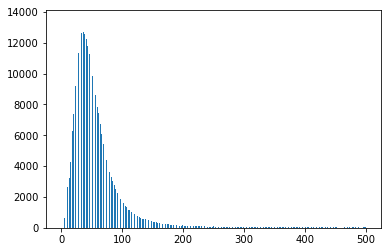

In [ ]:
plt.figure(1)
plt.hist(len_paras, range=[0, 500], normed=False, bins=500)

In [ ]:
tkn2df = {}
for tkn in tkn2tf.keys():
    tkn2df[tkn] = 0
    
csv_reader = csv.reader(open('final_final/data_whole_training.csv', 'r'))

print datetime.datetime.now().isoformat()
for n, row in enumerate(csv_reader):
    if (n+1) % 100000 == 0: print n+1,

    tmp_tkn = []
    head = row[1]
    body = row[2]
    doc = ' '.join([head, body])
    for tkn in doc.split():
        if tkn in tmp_tkn:
            continue
        else:
            tkn2df[tkn] += 1
            tmp_tkn.append(tkn)

print n, 'Done'
print datetime.datetime.now().isoformat()

2017-12-27T17:06:43.990426
100000 200000 300000 400000 500000

KeyboardInterrupt: 